In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

fp = os.path.join('..' ,'data', '07_model_output', 'visual_bert', '20220503-161039.pkl')
df = pd.read_pickle(fp)

In [26]:
fg_fp = os.path.join('..', 'data', '01_raw', 'fine_grained', 'dev_unseen.json')
fg = pd.read_json(fg_fp, lines=True)
fg_train_fp = os.path.join('..', 'data', '01_raw', 'fine_grained', 'train.json')
fg_train = pd.read_json(fg_train_fp, lines=True)

In [27]:
merged = pd.merge(df, fg, left_on='img_id', right_on='id')

In [28]:
merged.head()

,img_id,label,pred,source,id,set_name,img,text,gold_hate,gold_pc,gold_attack,pc,attack
0,76432,0,0.120957,val,76432,dev_unseen,img/76432.png,you thinking what i'm thinking?,[not_hateful],[pc_empty],[attack_empty],None,None
1,14270,0,0.120853,val,14270,dev_unseen,img/14270.png,a brilliant mind,[not_hateful],[pc_empty],[attack_empty],None,None
2,56947,0,0.808672,val,56947,dev_unseen,img/56947.png,"pro gamer 6.000.000 kills, 1 death",[not_hateful],[pc_empty],[attack_empty],None,None
3,35174,0,0.120750,val,35174,dev_unseen,img/35174.png,lets end poaching,[not_hateful],[pc_empty],[attack_empty],None,None
4,39264,0,0.120646,val,39264,dev_unseen,img/39264.png,my wife called me a good husband thats a huge ...,[not_hateful],[pc_empty],[attack_empty],None,None


In [29]:
merged = pd.merge(df, fg, left_on='img_id', right_on='id')
# unpack lists
for col in ['gold_hate', 'gold_pc', 'gold_attack']:
    for dataframe in [merged, fg_train]:
        dataframe[col] = dataframe[col].apply(lambda x: ''.join(x))

# create pred
merged['final_pred'] = (merged['pred']>0.5).astype(int)
merged['is_correct'] = merged['final_pred']==merged['label'] 

In [30]:
merged['gold_pc'].value_counts()

pc_empty                 341
religion                  62
race                      49
sex                       37
nationality               15
disability                13
racereligion               7
nationalityreligion        3
sexdisability              3
religionsex                2
racesex                    2
religionrace               2
racereligionsex            1
nationalityrace            1
nationalitydisability      1
sexrace                    1
Name: gold_pc, dtype: int64

In [32]:
pc_types = ['religion', 'race', 'sex', 'nationality', 'disability']

recalls = []
num_trainings = []
for pc_type in pc_types:
    filtered = merged[merged['gold_pc'].apply(lambda x: pc_type in x)]
    recall = filtered.is_correct.mean()
    recalls.append(recall)

    num_training = fg_train[fg_train['gold_pc'].apply(lambda x: pc_type in x)]
    num_trainings.append(num_training.shape[0])

recalls
num_trainings

[1078, 1008, 746, 325, 255]

Text(0, 0.5, 'Number of training examples')

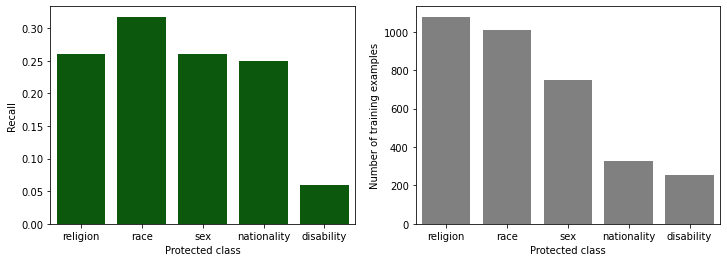

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
p1 = sns.barplot(x=pc_types, y=recalls, ax=ax[0], color='darkgreen')
p1.set_xlabel('Protected class')
p1.set_ylabel('Recall')

p2 = sns.barplot(x=pc_types, y=num_trainings, ax=ax[1], color='gray')
p2.set_xlabel('Protected class')
p2.set_ylabel('Number of training examples')